# SMS spam classification using NLP

## Reading data and visualization

In [1]:
## import modules

In [2]:
import pandas as pd
import nltk

### Reading the dataset

In [3]:
df=pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(1143, 5)

In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.rename(columns={'v1':'class', 'v2':'sms'}, inplace=True)
df.sample(10)

,class,sms
1043,0,Mmm thats better now i got a roast down me! i?...
153,0,As per your request 'Melle Melle (Oru Minnamin...
80,0,"Sorry, I'll call later"
287,0,hi baby im cruisin with my girl friend what r ...
501,0,When can ?_ come out?
316,0,Hmmm... Guess we can go 4 kb n power yoga... H...
136,0,He is there. You call and meet him
618,0,I come n pick ?_ up... Come out immediately af...
231,0,Dear we are going to our rubber place
240,0,Tomarrow final hearing on my laptop case so i ...


In [8]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
0       972    947                             Sorry, I'll call later    7
1       171    167  Today's Offer! Claim ur ?150 worth of discount...    2

In [9]:
df = df.drop_duplicates(keep='first')
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
0       947    947  Go until jurong point, crazy.. Available only ...    1
1       167    167  Free entry in 2 a wkly comp to win FA Cup fina...    1

## Data Visualization

In [10]:
df['Length'] = df['sms'].apply(len)
df.head(5)

,class,sms,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

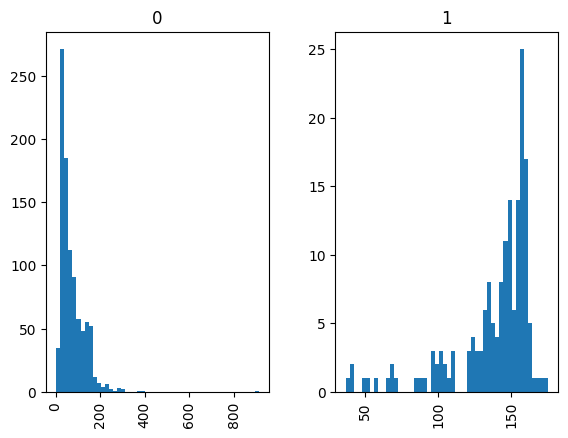

In [11]:
df.hist(column='Length', by='class', bins=50)

## Data Preprocessing

In [12]:
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')

from nltk.corpus import stopwords

nltk.download('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\THIS
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\THIS
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
df.head()

,class,sms,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### Preprocessing tasks
      #### Lower Case
      #### Tokernization
      #### Removing special character
      #### Removing the punctutations, and stop words
      #### Stemming

In [14]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stemmer and stop words
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    text = nltk.word_tokenize(text)

    # Remove non-alphanumeric tokens
    y = [i for i in text if i.isalnum()]

    # Remove stopwords and punctuation
    y = [i for i in y if i not in stop_words and i not in string.punctuation]

    # Apply stemming
    y = [ps.stem(i) for i in y]

    # Join the tokens back into a single string
    return " ".join(y)

# Assuming df is your DataFrame and 'sms' is the column to be cleaned
df['sms_cleaned'] = df['sms'].apply(clean_text)


[nltk_data] Downloading package punkt to C:\Users\THIS
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\THIS
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
import pandas as pd

# Set display options to avoid truncation
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)     # Display all rows
#pd.set_option('display.max_colwidth', None) # Display full column width for text

# Now when you print your dataframe, it will show all the data
df.head(100)  # Print the first 100 rows of your dataframe



,class,sms,Length,sms_cleaned
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,157,winner valu network custom select receivea 900...
9,1,Had your mobile 11 months or more? U R entitle...,154,mobil 11 month u r entitl updat latest colour ...


In [16]:
import regex

In [17]:
df['sms_cleaned']=df['sms_cleaned'].str.replace('\d+','', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\THIS PC\AppData\Local\Temp\ipykernel_17568\3798447032.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['sms_cleaned']=df['sms_cleaned'].str.replace('\d+','', regex=True)


In [18]:
df['sms_cleaned'].head()

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri  wkli comp win fa cup final tkt st ...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: sms_cleaned, dtype: object

## Build the Vocabulary

In [19]:
from collections import Counter
vocab =Counter()

In [20]:
for sentence in df['sms_cleaned']:
    vocab.update(sentence.split())

In [21]:
len(vocab)

2611

## Feature Extraction

In [22]:
import numpy as np

def vectorizer(ds,vocabulary):
    vectorizer_list=[]
    vocab_set=set(vocabulary)
    for sentence in ds:
        sentence_list=np.zeros(len(vocabulary),dtype=np.float16)
        sentence_words=sentence.split()

        for i, word in enumerate(vocabulary):
            if word in sentence_words:
                sentence_list[i]=1
        vectorizer_list.append(sentence_list)
        
        vectorizer_list_new=np.asarray(vectorizer_list, dtype=np.float16)

        return vectorizer_list_new

In [23]:
sms_cleaned_vectorizer=vectorizer(df['sms_cleaned'], vocab)
sms_cleaned_vectorizer

array([[1., 1., 1., ..., 0., 0., 0.]], dtype=float16)

In [24]:
sms_cleaned_vectorizer.shape

(1, 2611)

In [25]:
df.head()

,class,sms,Length,sms_cleaned
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt st ...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [26]:
x= df.drop({'class','sms','Length'}, axis=1)

In [27]:
x.head()

,sms_cleaned
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri wkli comp win fa cup final tkt st ...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though


In [28]:
y=df['class']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

In [29]:
#from sklearn.feature_extraction.text import TfidfVectorizer

#tf_vec= TfidfVectorizer(max_features=2)
#X= tf_vec.fit_transform(df['sms_cleaned']).toarray()
#y=tf_vec.fit_transform(df['class']).toarray()
#y

In [30]:
#X.shape

In [31]:
#Y = df['class'].copy()

In [32]:
#Y.head()

## Learning / Training the model

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)


In [34]:
X_train.head()

,sms_cleaned
388,mth half price orang line rental latest camera...
332,call germani penc per minut call fix line via...
1022,still tonight
981,reckon need town eightish walk carpark
591,special select receiv pound award call line ...


In [35]:
X_train.shape

(891, 1)

In [36]:
y_train.shape

(891,)

In [37]:
import numpy as np

def vectorizer(ds, vocabulary):
    vectorizer_list = []
    vocab_set = set(vocabulary)  # Use a set for faster lookup
    
    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary), dtype=np.float16)  # Use np.float16 to reduce memory usage
        sentence_words = set(sentence.split())  # Split and convert sentence to a set to speed up membership checking
        
        for i, word in enumerate(vocabulary):
            if word in sentence_words:  # Check if word exists in the sentence
                sentence_list[i] = 1
                
        vectorizer_list.append(sentence_list)
    
    # Convert the list to a numpy array only once
    vectorizer_list_new = np.asarray(vectorizer_list, dtype=np.float16)
    
    return vectorizer_list_new


In [38]:
vectorizer_x_train = vectorizer(X_train['sms_cleaned'],vocab)
vectorizer_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)

In [39]:
vectorizer_x_train.shape

(891, 2611)

In [40]:
vectorizer_x_test=vectorizer(X_test['sms_cleaned'],vocab)
vectorizer_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float16)

In [41]:
y_train.head()

388     1
332     1
1022    0
981     0
591     1
Name: class, dtype: int64

In [42]:
y_train.shape

(891,)

In [52]:
## check the value counts of y_train

In [53]:
y_train.value_counts()

class
0    750
1    141
Name: count, dtype: int64

In [59]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
vectorizer_x_train_smote, y_train_smote = smote.fit_resample(vectorizer_x_train, y_train)
print(vectorizer_x_train_smote.shape,y_train_smote.shape)

(1500, 2611) (1500,)


In [60]:
y_train_smote.value_counts()

class
1    750
0    750
Name: count, dtype: int64

In [43]:
#vectorizer_y_train.shape

In [44]:
#vectorizer_y_test=vectorizer(y_test,vocab)
#vectorizer_y_test.shape

In [45]:
## fix the class imbalanced issue

In [61]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(vectorizer_x_train_smote,y_train_smote)

MultinomialNB()

In [62]:
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix


In [63]:
y_pred= model.predict(vectorizer_x_test)
print(accuracy_score(y_test,y_pred))

0.9372197309417041


In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       197
           1       0.68      0.88      0.77        26

    accuracy                           0.94       223
   macro avg       0.83      0.91      0.87       223
weighted avg       0.95      0.94      0.94       223



In [66]:
# Assuming your model is already trained and stored in 'model'

# Example new data for testing (replace with your actual test data)
new_data = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]

# Transform the new data using the same vectorizer used for training
X_new = vectorizer(new_data, vocab)  # Replace 'vectorizer' with your actual vectorizer object

# Make predictions
predictions = model.predict(X_new)
predictions
# Print predictions
for text, prediction in zip(new_data, predictions):
    print(f'Text: {text} --> Predicted: {"Spam" if prediction == 1 else "hamp"}')


Text: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... --> Predicted: hamp


In [ ]:
import pickle

# Save the model and vectorizer
with open('spam_classifier.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tf_vec, vectorizer_file)
